### Import Libraries


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [232]:
# Load data
df = pd.read_csv('../dataset/data.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [233]:
# Variables table
df_variables = pd.read_csv('../dataset/variables.csv')
df_variables.head(len(df_variables))

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,NaN,NaN,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",NaN,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",NaN,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",NaN,no
4,default,Feature,Binary,NaN,has credit in default?,NaN,no
5,balance,Feature,Integer,NaN,average yearly balance,euros,no
6,housing,Feature,Binary,NaN,has housing loan?,NaN,no
7,loan,Feature,Binary,NaN,has personal loan?,NaN,no
8,contact,Feature,Categorical,NaN,contact communication type (categorical: 'cell...,NaN,yes
9,day_of_week,Feature,Date,NaN,last contact day of the week,NaN,no


In [234]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


#### Target Variable

In [235]:
# Target variable
df_target = pd.read_csv('../dataset/labels.csv')
df_target.head()

,y
0,no
1,no
2,no
3,no
4,no


In [236]:
# Value counts
df_target['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [237]:
# Normalised value counts
df_target['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

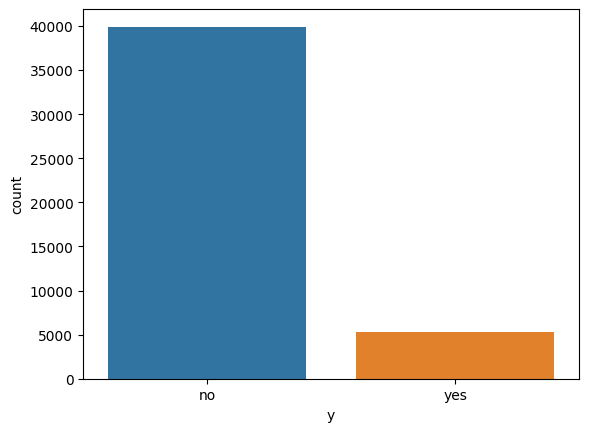

In [238]:
# Visualise the target variable
sns.countplot(x='y', data=df_target, hue='y')
plt.show()

### Exploratory Data Analysis

#### Missing Values

In [239]:
# Count missing values per column
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [240]:
# Replace missing values

# Numerical columns have no missing values

# Categorical columns
df = df.fillna(value={'job' : 'missing'})
df = df.fillna(value={'education' : 'missing'})
df = df.fillna(value={'contact' : 'missing'})
df = df.fillna(value={'poutcome' : 'missing'})


In [241]:
# Recount missing values per column
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

#### Unique Values

In [242]:
# Investigate unique values
df.nunique()

age              77
job              12
marital           3
education         4
default           2
balance        7168
housing           2
loan              2
contact           3
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          4
dtype: int64

#### Categorical Variables

In [243]:
# Add the 'y' column from df_target as a new column in df
df['y'] = df_target['y']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,missing,5,may,261,1,-1,0,missing,no
1,44,technician,single,secondary,no,29,yes,no,missing,5,may,151,1,-1,0,missing,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,missing,5,may,76,1,-1,0,missing,no
3,47,blue-collar,married,missing,no,1506,yes,no,missing,5,may,92,1,-1,0,missing,no
4,33,missing,single,missing,no,1,no,no,missing,5,may,198,1,-1,0,missing,no


In [244]:
# Categorical Variables
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")
    
    # Print the count of each category
    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")

    # Print the ratio of each category
    print("{0} Ratio".format(col_name))
    print(df[col_name].value_counts(normalize=True))
    print("\n")
    
    # Print counts of y grouped by the categorical column
    print("{0} Default Counts".format(col_name))
    print(df.groupby(col_name)['y'].value_counts().unstack(level=-1))
    print("\n")

    # Print ratio of y grouped by the categorical column
    print("{0} Default Ratio".format(col_name))
    print(df.groupby(col_name)['y'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    # Plot ratio of y by the categorical column
    sns.catplot(data=df,kind='count',x=col_name,hue='y')
    plt.show()

education Summary


education Counts
education
secondary    23202
tertiary     13301
primary       6851
missing       1857
Name: count, dtype: int64


education Ratio
education
secondary    0.513194
tertiary     0.294198
primary      0.151534
missing      0.041074
Name: proportion, dtype: float64


education Default Counts
y             no   yes
education             
missing     1605   252
primary     6260   591
secondary  20752  2450
tertiary   11305  1996


education Default Ratio
y                no       yes
education                    
missing    0.864297  0.135703
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064




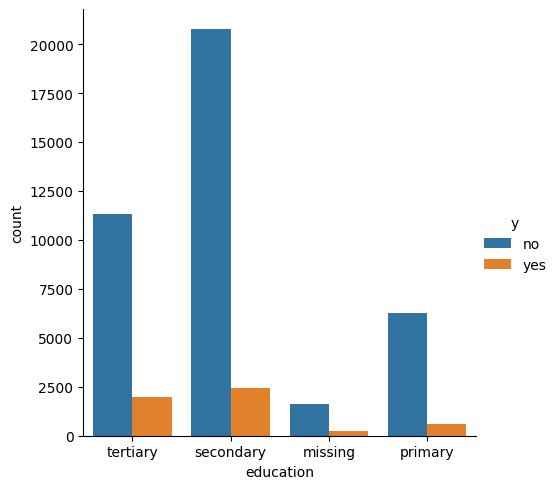

In [245]:
# Explore job column
explore_categorical('education')

#### Continuous Variables

In [261]:
# Continous Variables 
def explore_continuous(col_name):
    # Print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(df[col_name].describe())
    print("\n")

    # Look at boxplot
    sns.boxplot(x=col_name, data=df)
    plt.show()

    # Look at the distribution
    sns.displot(df[col_name], kde=True)
    plt.show()

    # Grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(df.groupby('y')[col_name].describe())

    # Look at grouped boxplot 
    sns.boxplot(x=col_name, y='y', data=df, orient="h")
    plt.show()

pdays Summary


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64




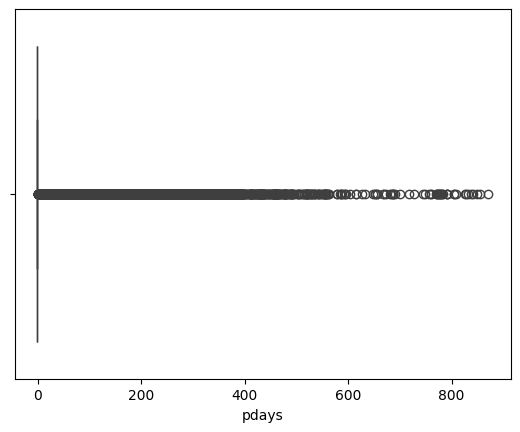

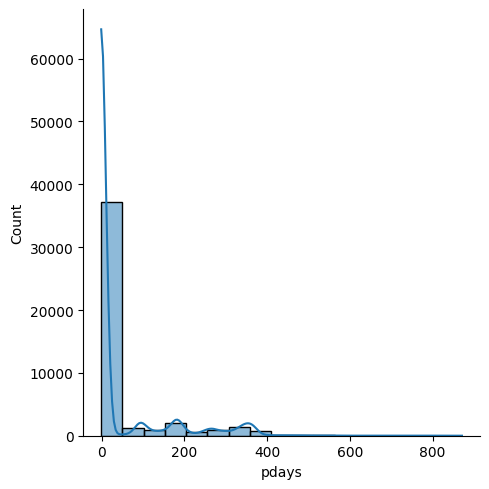

pdays Grouped Summary


       count       mean         std  min  25%  50%   75%    max
y                                                              
no   39922.0  36.421372   96.757135 -1.0 -1.0 -1.0  -1.0  871.0
yes   5289.0  68.702968  118.822266 -1.0 -1.0 -1.0  98.0  854.0


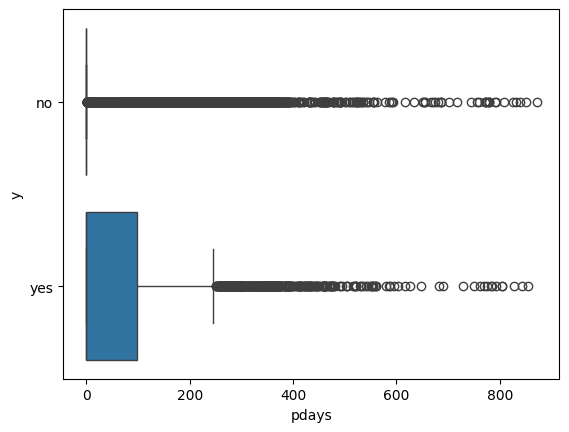

In [247]:
# Explore age column
explore_continuous('pdays') 

housing Summary


housing Counts
housing
yes    25130
no     20081
Name: count, dtype: int64


housing Ratio
housing
yes    0.555838
no     0.444162
Name: proportion, dtype: float64


housing Default Counts
y           no   yes
housing             
no       16727  3354
yes      23195  1935


housing Default Ratio
y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000




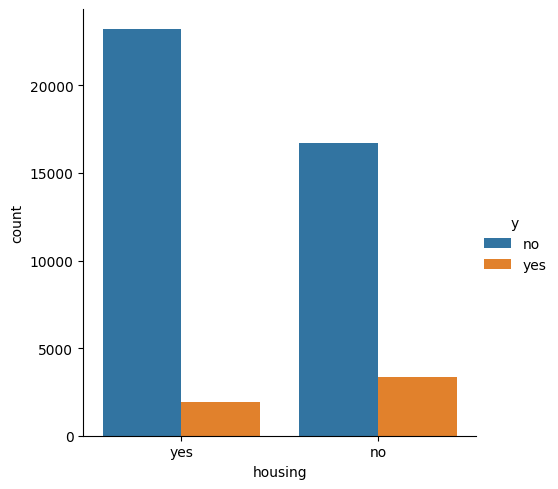

In [248]:
# Binary Variables
explore_categorical('housing')

### Normalisation

#### Numerical Columns

In [249]:
numerical_columns = df_variables[df_variables['type'] == 'Integer']['name'].tolist()
print(numerical_columns)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


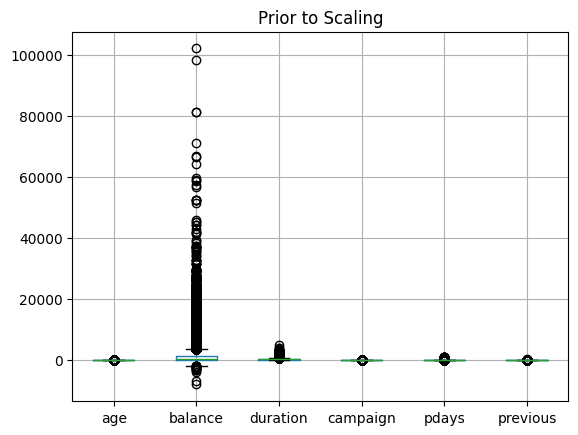

In [250]:
# Prior to scaling
df[numerical_columns].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [251]:

# Min-max normalisation
mm_scalar = MinMaxScaler()
df[numerical_columns] = mm_scalar.fit_transform(df[numerical_columns])

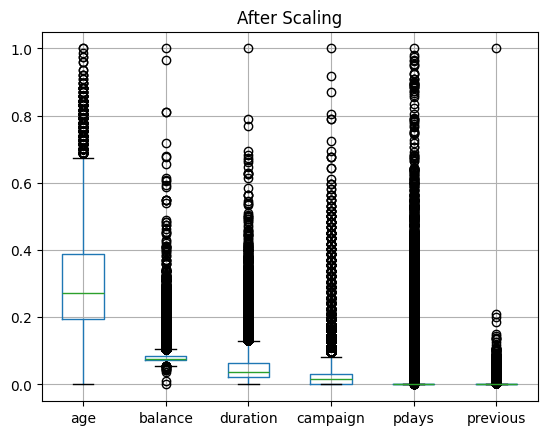

In [252]:
# After scaling
df[numerical_columns].boxplot()
plt.title('After Scaling')
plt.show()

#### Binary Columns

In [253]:
binary_columns = df_variables[df_variables['type'] == 'Binary']['name'].tolist()
print(binary_columns)

['default', 'housing', 'loan', 'y']


In [254]:
df[binary_columns] = df[binary_columns].apply(lambda col: col.map({'yes': 1, 'no': 0}))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,0,0.092259,1,0,missing,5,may,0.053070,0.0,0.0,0.0,missing,0
1,0.337662,technician,single,secondary,0,0.073067,1,0,missing,5,may,0.030704,0.0,0.0,0.0,missing,0
2,0.194805,entrepreneur,married,secondary,0,0.072822,1,1,missing,5,may,0.015453,0.0,0.0,0.0,missing,0
3,0.376623,blue-collar,married,missing,0,0.086476,1,0,missing,5,may,0.018707,0.0,0.0,0.0,missing,0
4,0.194805,missing,single,missing,0,0.072812,0,0,missing,5,may,0.040260,0.0,0.0,0.0,missing,0


#### Categorical Columns

##### Ordinal Columns

In [255]:
## Categorical (Ordinal data)
ordinal_column = 'education'
categories = sorted(df[ordinal_column].unique())

# Ordinal-encoding
df[ordinal_column] = df[ordinal_column].apply(lambda x: (categories.index(x)) / (len(categories) - 1))
 
df.head()

print(df[ordinal_column].value_counts())



education
0.666667    23202
1.000000    13301
0.333333     6851
0.000000     1857
Name: count, dtype: int64


##### Nominal Columns

In [256]:
## Categorical (Nominal) - One hot encoding  
nominal_column = df_variables[
    (df_variables['type'] == 'Categorical') & 
    (df_variables['name'] != 'education')
]['name'].tolist()
print(nominal_column)

df_encoded = pd.get_dummies(df, columns=nominal_column, drop_first=False)
new_cols = [col for col in df_encoded.columns if any(orig_col + '_' in col for orig_col in nominal_column)]
df_encoded[new_cols] = df_encoded[new_cols].astype(int)
df_encoded.head()


['job', 'marital', 'contact', 'poutcome']


,age,education,default,balance,housing,loan,day_of_week,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_missing,contact_telephone,poutcome_failure,poutcome_missing,poutcome_other,poutcome_success
0,0.519481,1.000000,0,0.092259,1,0,5,may,0.053070,0.0,...,0,1,0,0,1,0,0,1,0,0
1,0.337662,0.666667,0,0.073067,1,0,5,may,0.030704,0.0,...,0,0,1,0,1,0,0,1,0,0
2,0.194805,0.666667,0,0.072822,1,1,5,may,0.015453,0.0,...,0,1,0,0,1,0,0,1,0,0
3,0.376623,0.000000,0,0.086476,1,0,5,may,0.018707,0.0,...,0,1,0,0,1,0,0,1,0,0
4,0.194805,0.000000,0,0.072812,0,0,5,may,0.040260,0.0,...,0,0,1,0,1,0,0,1,0,0


### Dealing with Dates

### Train/Validation/Test Split

### ANN

### Model Evaluation

In [257]:
# Confusion Matrix
# Precision
# Recall
# F1 Score

In [258]:
# Decaying learning rate and non decaying learning rate